In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [22]:
import matplotlib.patches as mpatches

In [23]:
train_X = np.random.rand(100, ).astype(np.float32)
#np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
#np.random.rand(100, ).astype(np.float32)

In [24]:
y_data = train_X*3 + 2
train_Y  = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.2))(y_data)

#train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [25]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [26]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [27]:
pred = tf.add(tf.multiply(X, W), b)
#pred = w*x + b

In [28]:
#cost = tf.reduce_mean(tf.square(pred-Y))
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [40]:
learning_rate = 0.01

In [41]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [42]:
init = tf.global_variables_initializer()

In [45]:
n_epochs = 500
display_step=10
batch_size = 20
params = np.zeros((3,n_epochs))
feed={X: train_X, Y: train_Y}
params

train_X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

<IPython.core.display.Javascript object>


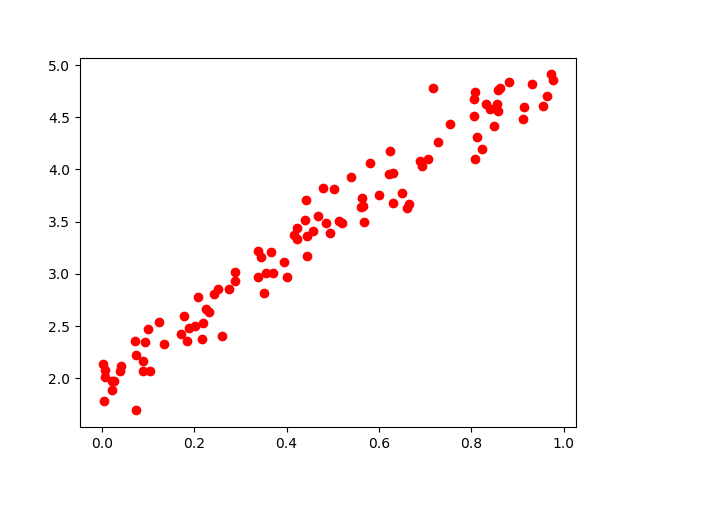

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [49]:
with tf.Session() as sess:
    sess.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    fig.show()
    fig.canvas.draw()
    
    for epoch in range(n_epochs):
        _, loss_val, W_, b_ = sess.run([optimizer, cost, W, b], feed_dict=feed)
        
        if(epoch+1) % display_step == 0:
            print("step {} cost {}".format(epoch, loss_val))
        
        params[:,epoch] = np.array([W_, b_, loss_val])
        ax.clear()
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        ax.plot(train_X, W_ * train_X + b_)
        fig.canvas.draw()        
    
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()



In [39]:
param_titles = ['Weight', 'Bias', 'Loss']

for i in range(params.shape[0]):
    plt.subplot(3, 1, i+1)
    plt.plot(params[i])
    plt.title(param_titles[i])
    plt.show()